# Summary Report 

#### Table of Contents:
* Background
* Research Question
* RL Problem Setup
* Modeling
* Results
* Future Directions

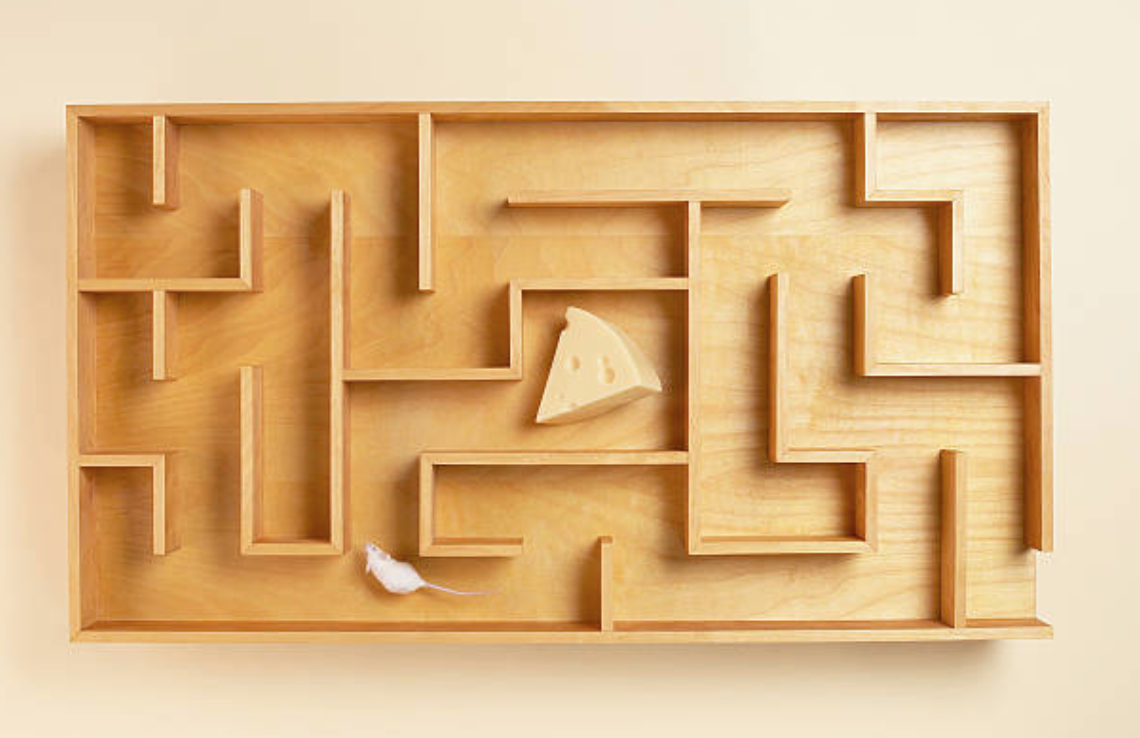

In [35]:
Image(filename='pictures/maze_2.png',width=800, height=800)

### Background

Mazes are widely to test learning and memory in psychology and behavioral neuroscience experiments for mice and rats. One of the most famous mazes is Morris Water Maze, where there is a hidden platform which can't be seen from the surface of the water. Mice's learning and memory ability will be tested depending on how quickly they can find the platform with previous exposure to it.  

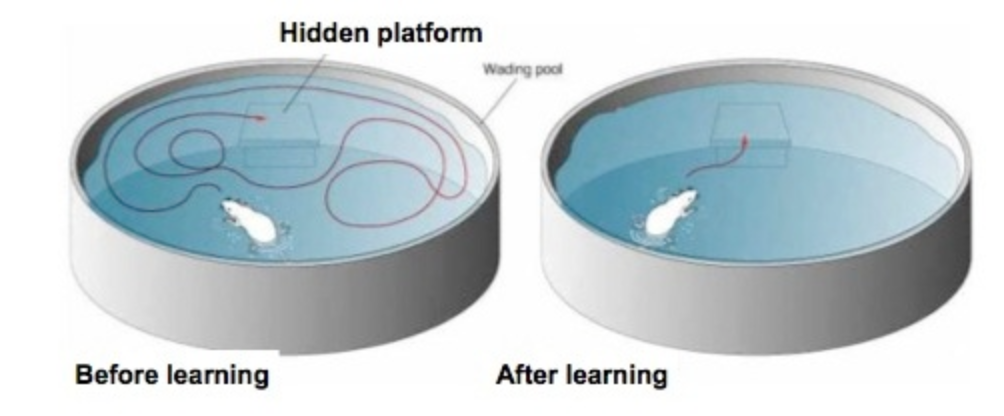

In [11]:
Image(filename='pictures/morris_maze.png',width=600, height=600)

### Research Question

“Can I train a reinforcement learning agent(a mouse) to learn to navigate through a maze to find the ultimate reward(cheese)?”

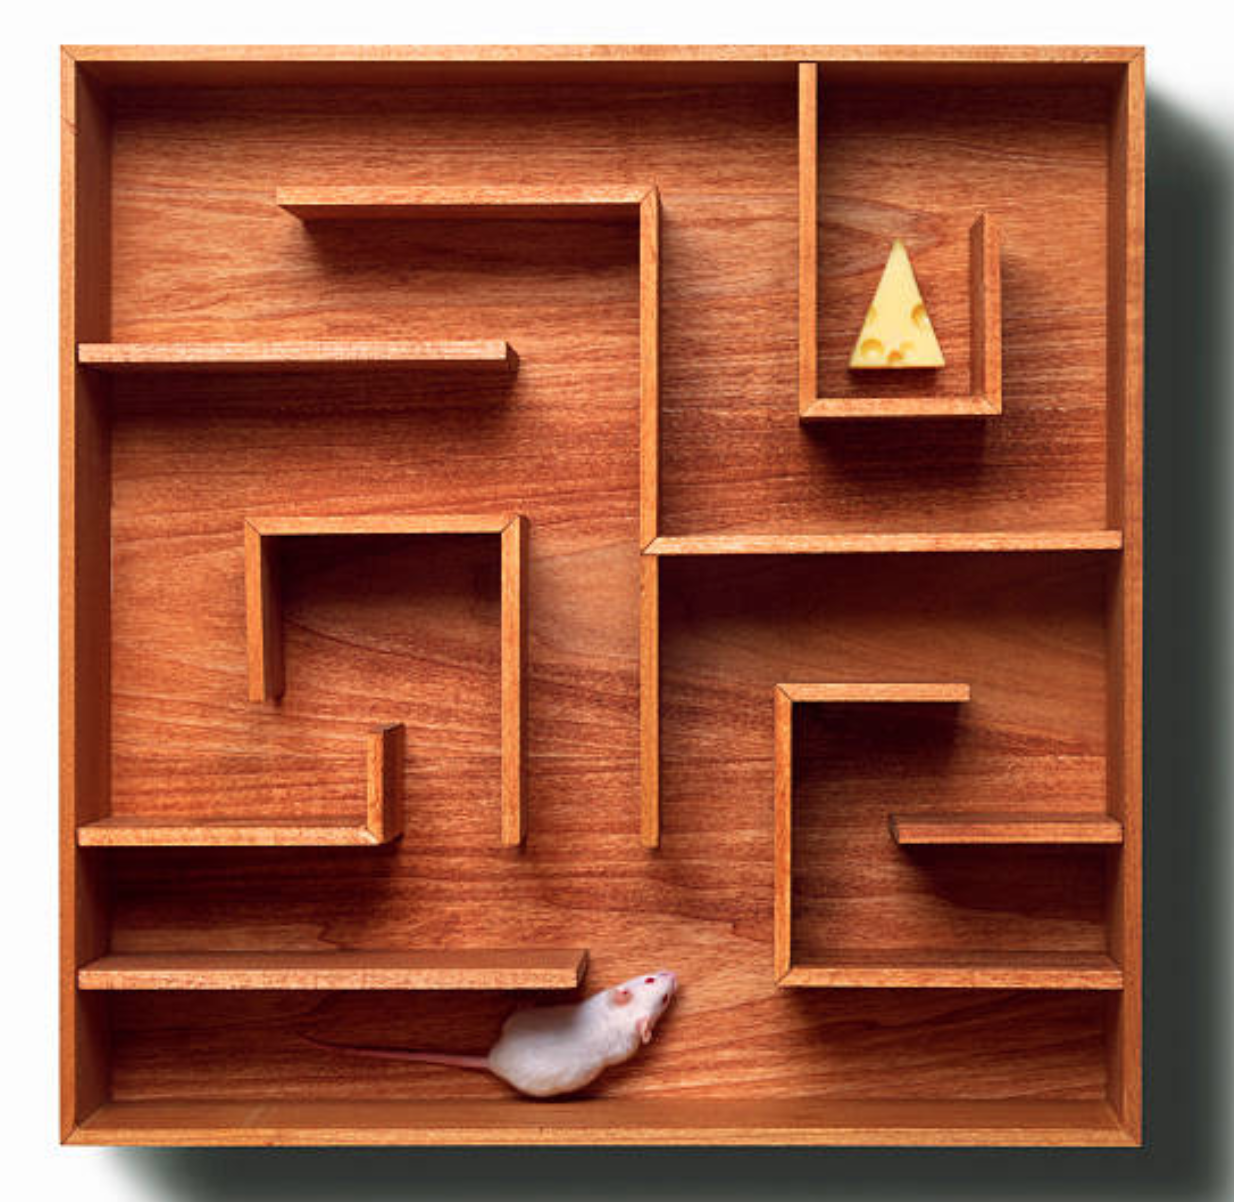

In [10]:
Image(filename='pictures/maze_1.png',width=600, height=600)

### RL Problem Setup

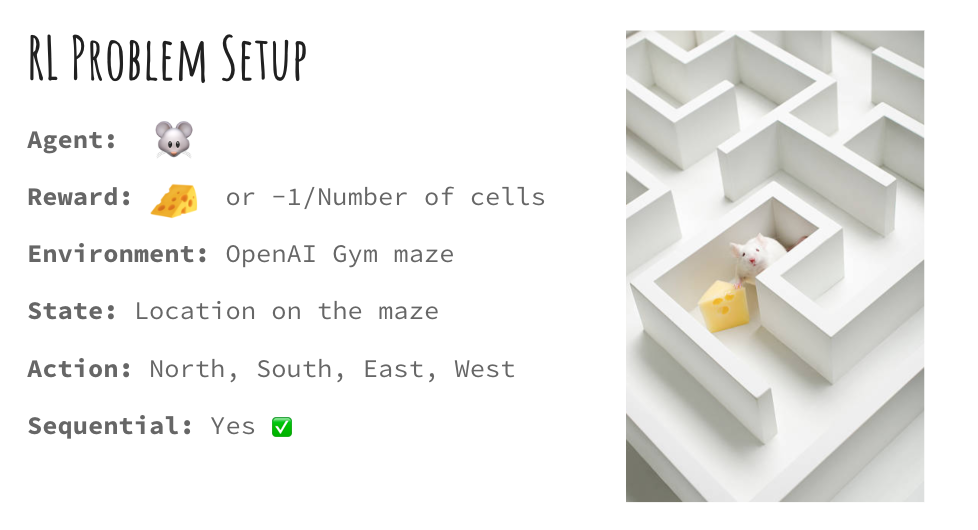

In [6]:
Image(filename='pictures/rl_problem.png',width=800, height=800)

### The Environment

For this project, I am using `OpenAI's` Gym maze. The environment comes with a set of possible actions the agent can take (moving North, South, East, West), as well as a reward associated with each state. There is a small negative reward associated with all cells (-0.1/number of cells), except the final terminal cell which has a large positive reward(+1). Given the size, Gym maze generates a random maze. Therefore, for each game the maze looks different.

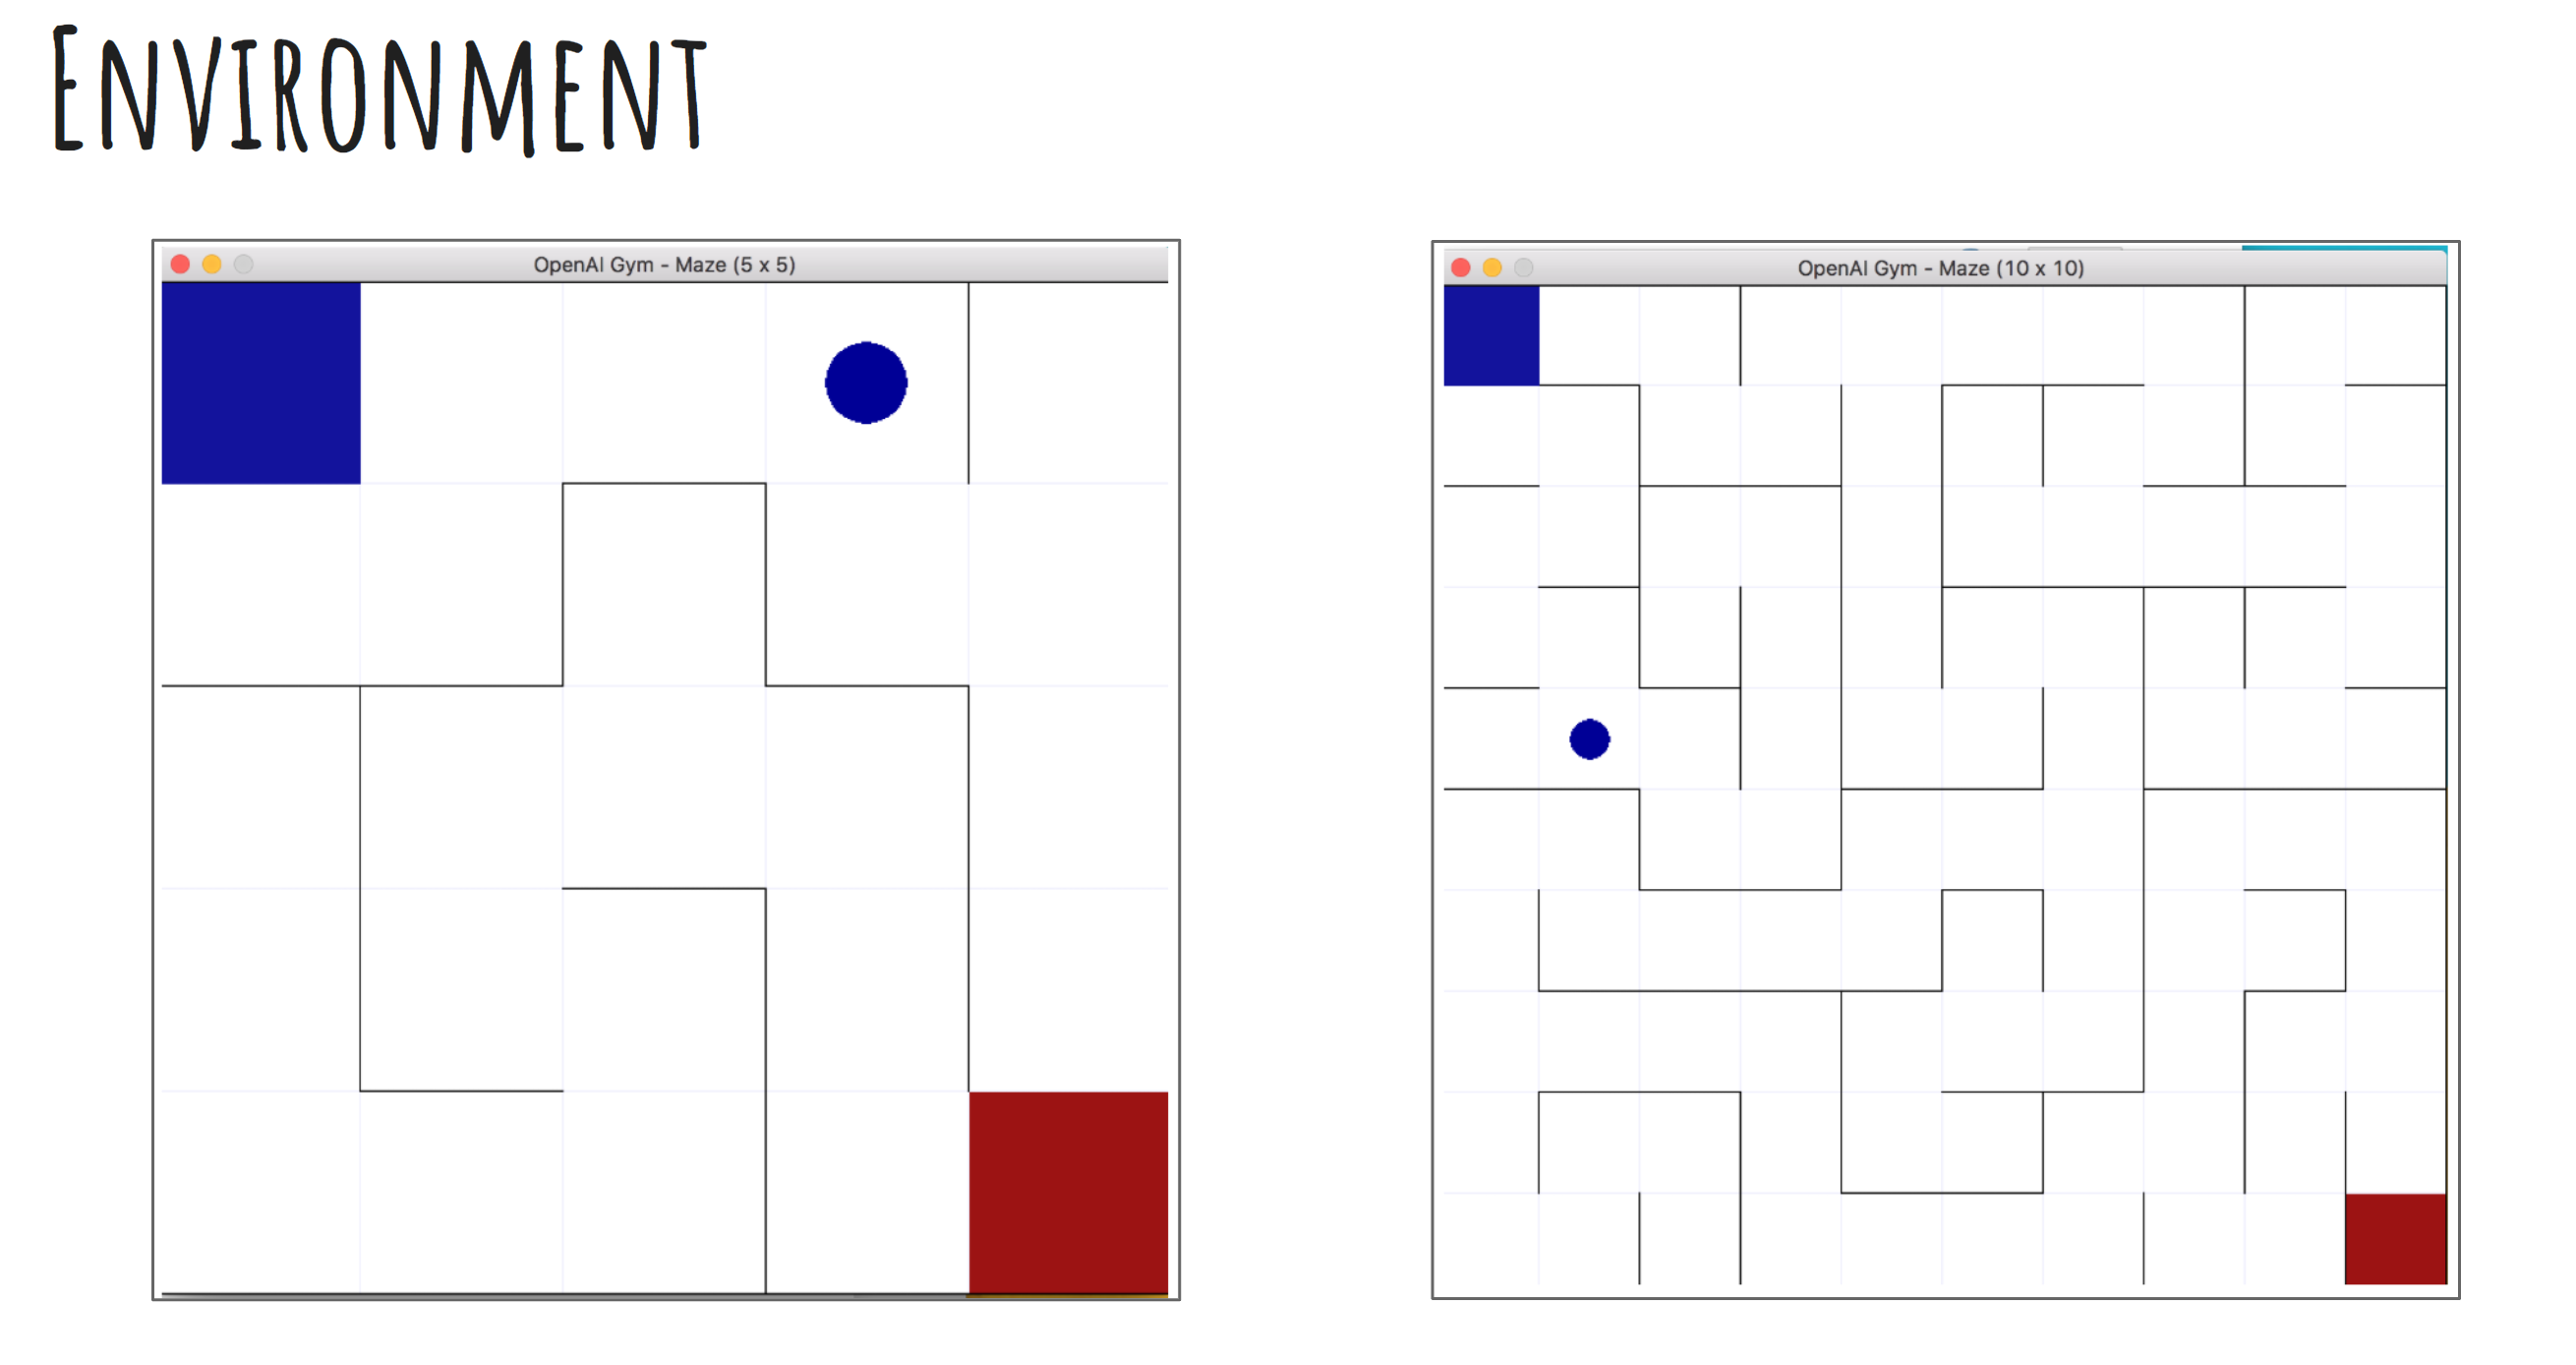

In [7]:
Image(filename='pictures/env.png',width=800, height=800)

### Modeling

I used tabular Q-learning for this project and the agent learns to work its way through the maze to get to the end of the maze where the ultimate reward (the hypothetical cheese) is. The Q-values are initialized with 0 and they are updated after each episode. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gym
import gym_maze
import random
from IPython.display import Image
import pygame
import time
import seaborn as sns
sns.set()

pygame 2.0.0.dev1 (SDL 2.0.9, python 3.7.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [8]:
class QlearningMouse:
    """
    The QlearningMouse object is a reinforcement learning 
    mouse agent that uses Q-learning to work its way through 
    an Open-ai maze to get to the end of the maze where the 
    reward (the hypothetical cheese) is. 
    
    This object has attributes such as state, decay factor, 
    discount rate, exploration rate and a Q-table. 
    It also has methods for stepping (deciding what the next 
    action is using the epsilon-greedy approach) and updating 
    the Q-table, as well as initializing a new episode. 
    
    This object uses a decaying epsilon and learning rate, 
    which improves its performance and makes it converge 
    faster. 
    """

    def __init__(self,
                 maze_width,
                 maze_height,
                 epsilon=0.9,
                 learning_rate=0.9,
                 decay_factor=10,
                 gamma=0.90):

        self.epsilon = epsilon
        self.state = (0., 0.)
        self.learning_rate = learning_rate
        self.decay_factor = decay_factor
        self.gamma = gamma
        self.episode = 0

        # initializing q-table
        self.q_table = {}
        for i in range(maze_width):
            for j in range(maze_height):
                self.q_table[(i, j)] = [0., 0., 0., 0.]

    def step(self):
        """
        Returns the next action, exploiting (1-epsilon)% of the time and
        exploring epsilon% of the time.
        """
        if random.random() < self.decayed_epsilon():
            return env.action_space.sample()
        else:
            action_idx = np.argmax(
                self.q_table[(self.state[0], self.state[1])])
            return int(action_idx)

    def decayed_epsilon(self):
        """
        Given the number of episodes, returns epsilon.
        Decayed epsilon is used because it makes the convergance much 
        faster. The epsilon is high at first, making the agent explore 
        more and it decreases as the number of episodes increase and the 
        agent exploits more.
        """
        # exploration rate is never smaller than 0.001 and never greater than 0.9
        return max(0.001, min(0.9, 1.0 - np.log10(self.episode/self.decay_factor)))

    def decayed_learning_rate(self):
        """
        Given the number of episodes, returns learning rate. 
        Similar to the decayed_epsilon() function, this function returns 
        the learning rate depending on the number of episodes. The learning 
        rate is high at first and it decreases as the number of episodes 
        increase, resulting in better learning performance. 
        """
        # learning rate is never smaller than 0.2 and never greater than 0.9
        return max(0.2, min(0.9, 1.0 - np.log10(self.episode/self.decay_factor)))

    def update(self, action, observation, reward):
        """
        Updates q-table based on an action, observation and reward. 
        """
        best_q = np.amax(
            self.q_table[(int(observation[0]), int(observation[1]))])

        q_table_key = (self.state[0], self.state[1])
        
        # updating Q-table using the Q-learning formula
        self.q_table[q_table_key][action] += \
            self.decayed_learning_rate() * (reward + self.gamma * (best_q) -
                                            self.q_table[q_table_key][action])

        self.state = [int(observation[0]), int(observation[1])]

    def init_new_episode(self, init_state):
        """
        Initiates a new episode for learning.
        """
        self.episode += 1
        self.state = [int(init_state[0]), int(init_state[1])]

I decided to use a decaying exploration factor(epsilon) that is high at the beginning and it decreases as the number of episodes increase. This will result in high exploration in the beginning and high exploitation as the agent learns.  

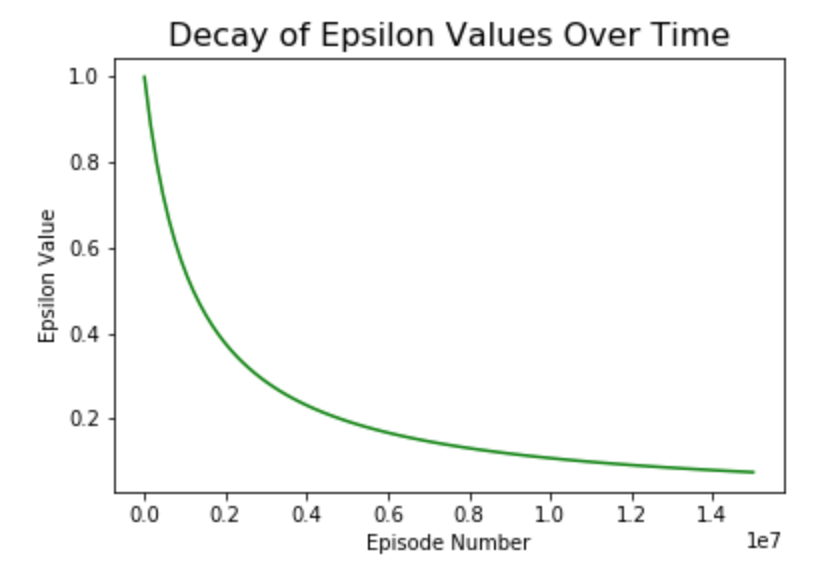

In [9]:
Image(filename='pictures/epsilon_decay.png',width=800, height=800)

I have also used a decaying learning rate. Similar to epsilon, the algorithm converges faster and more efficiently with a decaying learning rate because in the beginning, when we are not close to the minimum of the function we're optimizing, the learning rate is high and we take larger steps. As we get closer to the minimum, we take smaller steps so that we don't miss the minimum. 

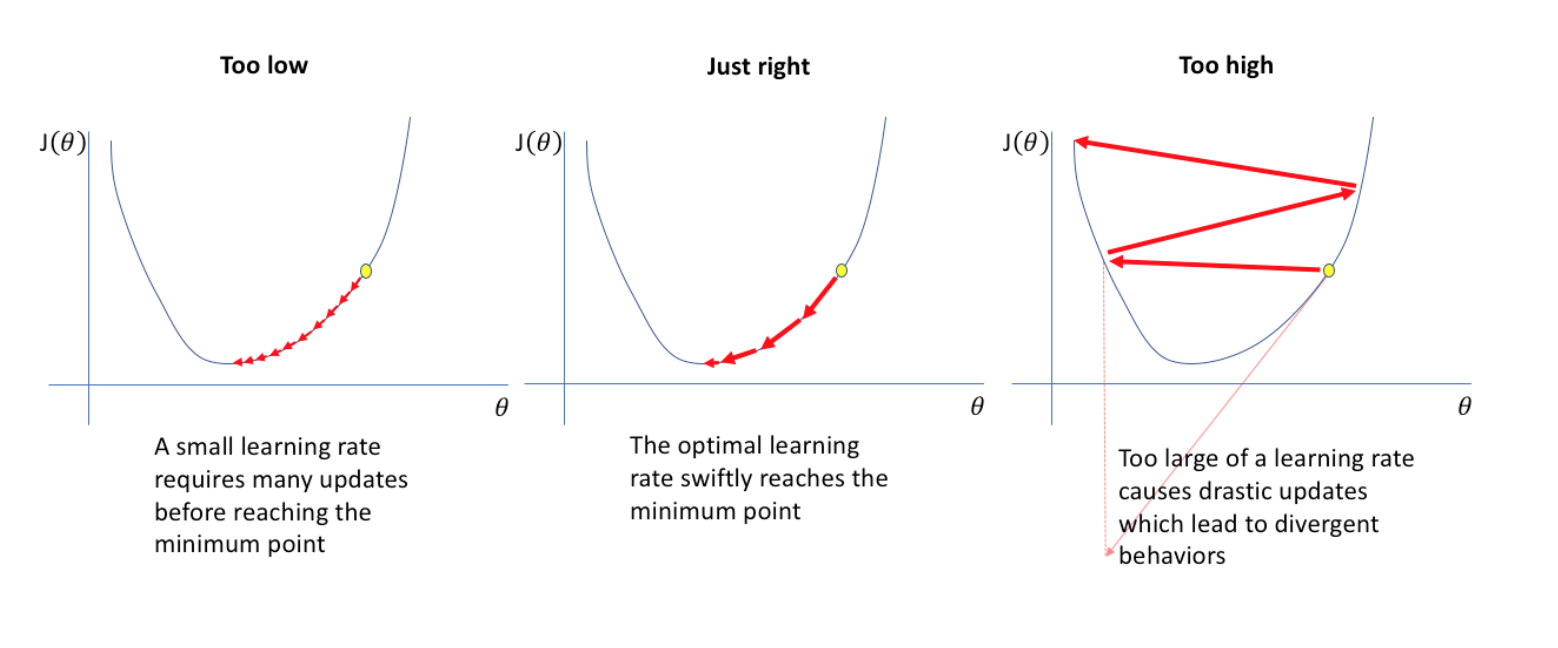

In [12]:
Image(filename='pictures/lr.png',width=800, height=800)

The following function trains a mouse to find cheese in a given maze. 

In [18]:
maze_episodes = {}
def find_cheese(env, agent, episodes=2000, steps=10000, should_render=False):
    """
    Given a gym environment and an agent object, trains a mouse to find cheese.
    
    Should_render: should be set to 'True' if you want to view the the maze.
    The kernel should be reset after each time it runs.
    """
    env_height = env.observation_space.high[0] + 1
    env_width = env.observation_space.high[1] + 1
    
    try:
        start = time.time_ns()
        number_of_steps = []
        for i_episode in range(episodes):
            print(f"Starting episode {i_episode}")

            observation = env.reset()
            agent.init_new_episode(observation)
            for t in range(steps):
                
                if should_render:
                    env.render()
                    
                action = agent.step()
                observation, reward, done, info = env.step(action)
                agent.update(action, observation, reward)
                
                if done:
                    print(f"Episode finished after {t+1} timesteps")
                    number_of_steps.append(t+1)
                    break
            
            # if the number of steps hasn't changed for the past 10 episodes, the optimal solution has been found
            if len(number_of_steps) > 10 and len(set(number_of_steps[-10:])) == 1: 
                end = time.time_ns()
                
                maze_episodes[(env_height, env_width)] = {
                    "steps": number_of_steps,
                    "num_episodes": i_episode,
                    "execution_time_ms": (end - start) // 1_000_000
                }
                
                break
    finally:
        env.close()
        pygame.display.quit()
        pygame.quit()
        env.close()

# Results

In [19]:
mazes = [
    'maze-v0',
    'maze-random-3x3-v0',
    'maze-random-5x5-v0',
    'maze-sample-10x10-v0',
    'maze-random-10x10-v0',
    'maze-random-20x20-plus-v0',
    'maze-random-30x30-plus-v0'
]

### Results for a 3x3 Maze

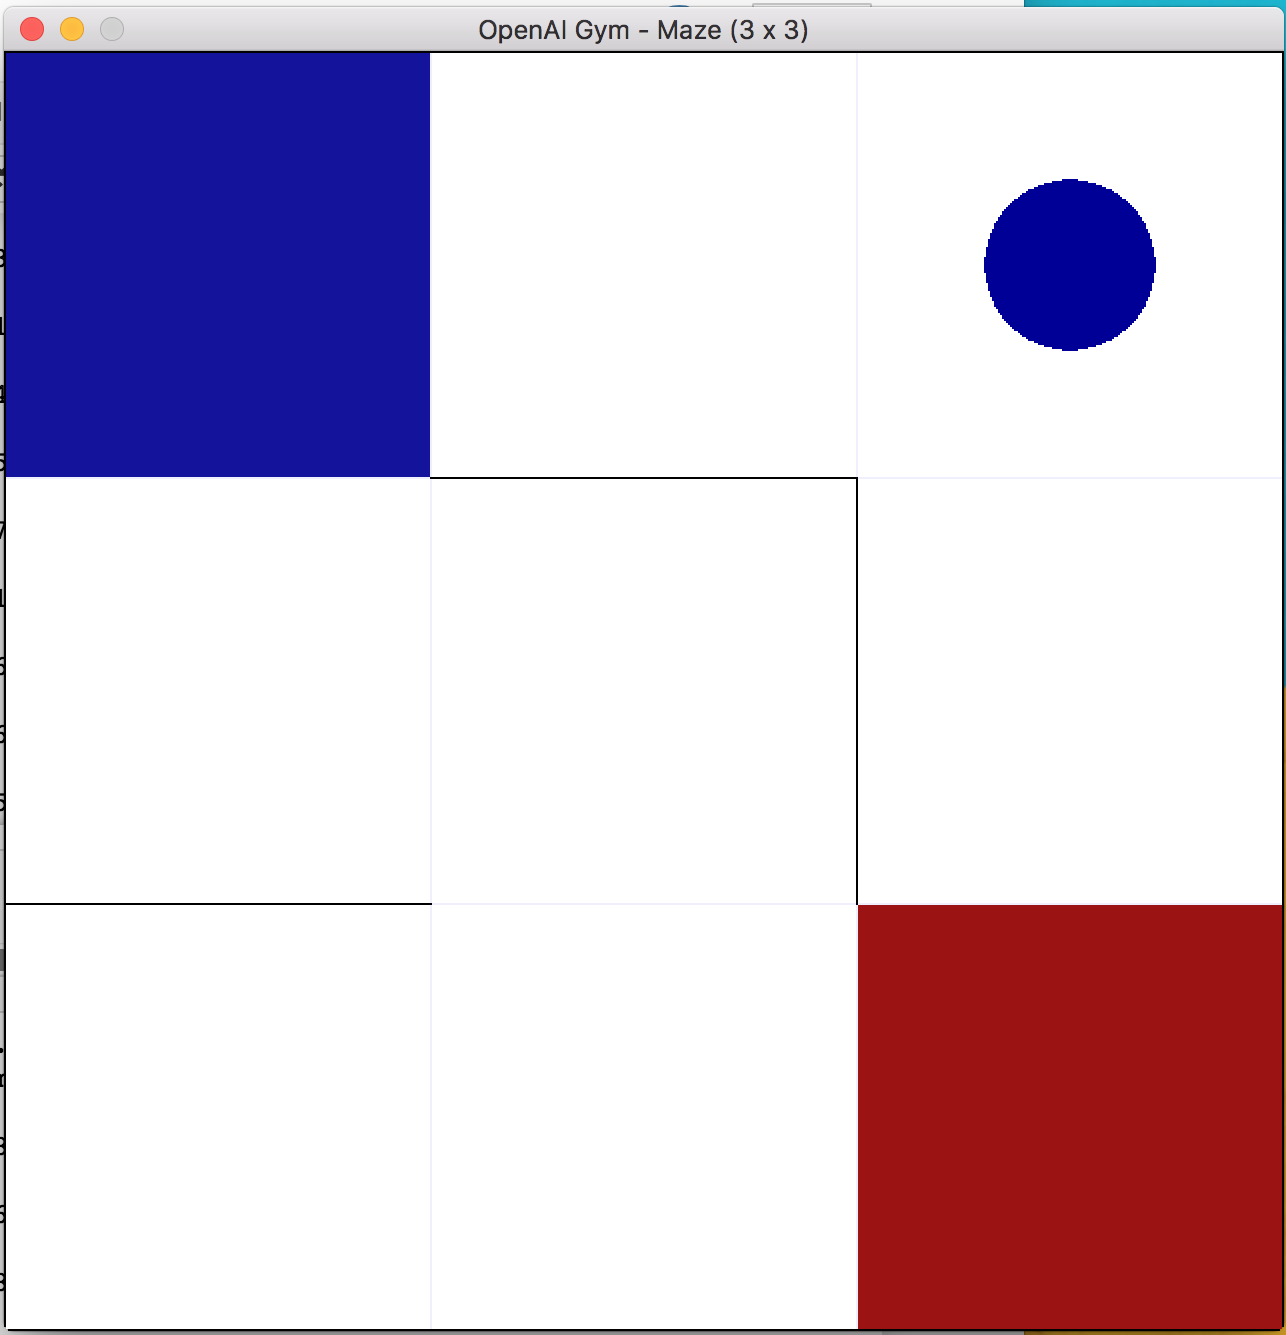

In [20]:
Image(filename='pictures/2.png',width=400, height=400)

In [21]:
env = gym.make(mazes[1])
env_height = env.observation_space.high[0] + 1
env_width = env.observation_space.high[1] + 1
agent = QlearningMouse(env_height, env_width)
find_cheese(env, agent, should_render=False)

Starting episode 0
Episode finished after 21 timesteps
Starting episode 1
Episode finished after 76 timesteps
Starting episode 2
Episode finished after 55 timesteps
Starting episode 3
Episode finished after 43 timesteps
Starting episode 4
Episode finished after 58 timesteps
Starting episode 5
Episode finished after 25 timesteps
Starting episode 6
Episode finished after 8 timesteps
Starting episode 7
Episode finished after 51 timesteps
Starting episode 8
Episode finished after 17 timesteps
Starting episode 9
Episode finished after 6 timesteps
Starting episode 10
Episode finished after 54 timesteps
Starting episode 11
Episode finished after 18 timesteps
Starting episode 12
Episode finished after 39 timesteps
Starting episode 13
Episode finished after 12 timesteps
Starting episode 14
Episode finished after 53 timesteps
Starting episode 15
Episode finished after 19 timesteps
Starting episode 16
Episode finished after 8 timesteps
Starting episode 17
Episode finished after 26 timesteps
Start

### Results for a 10x10 Maze

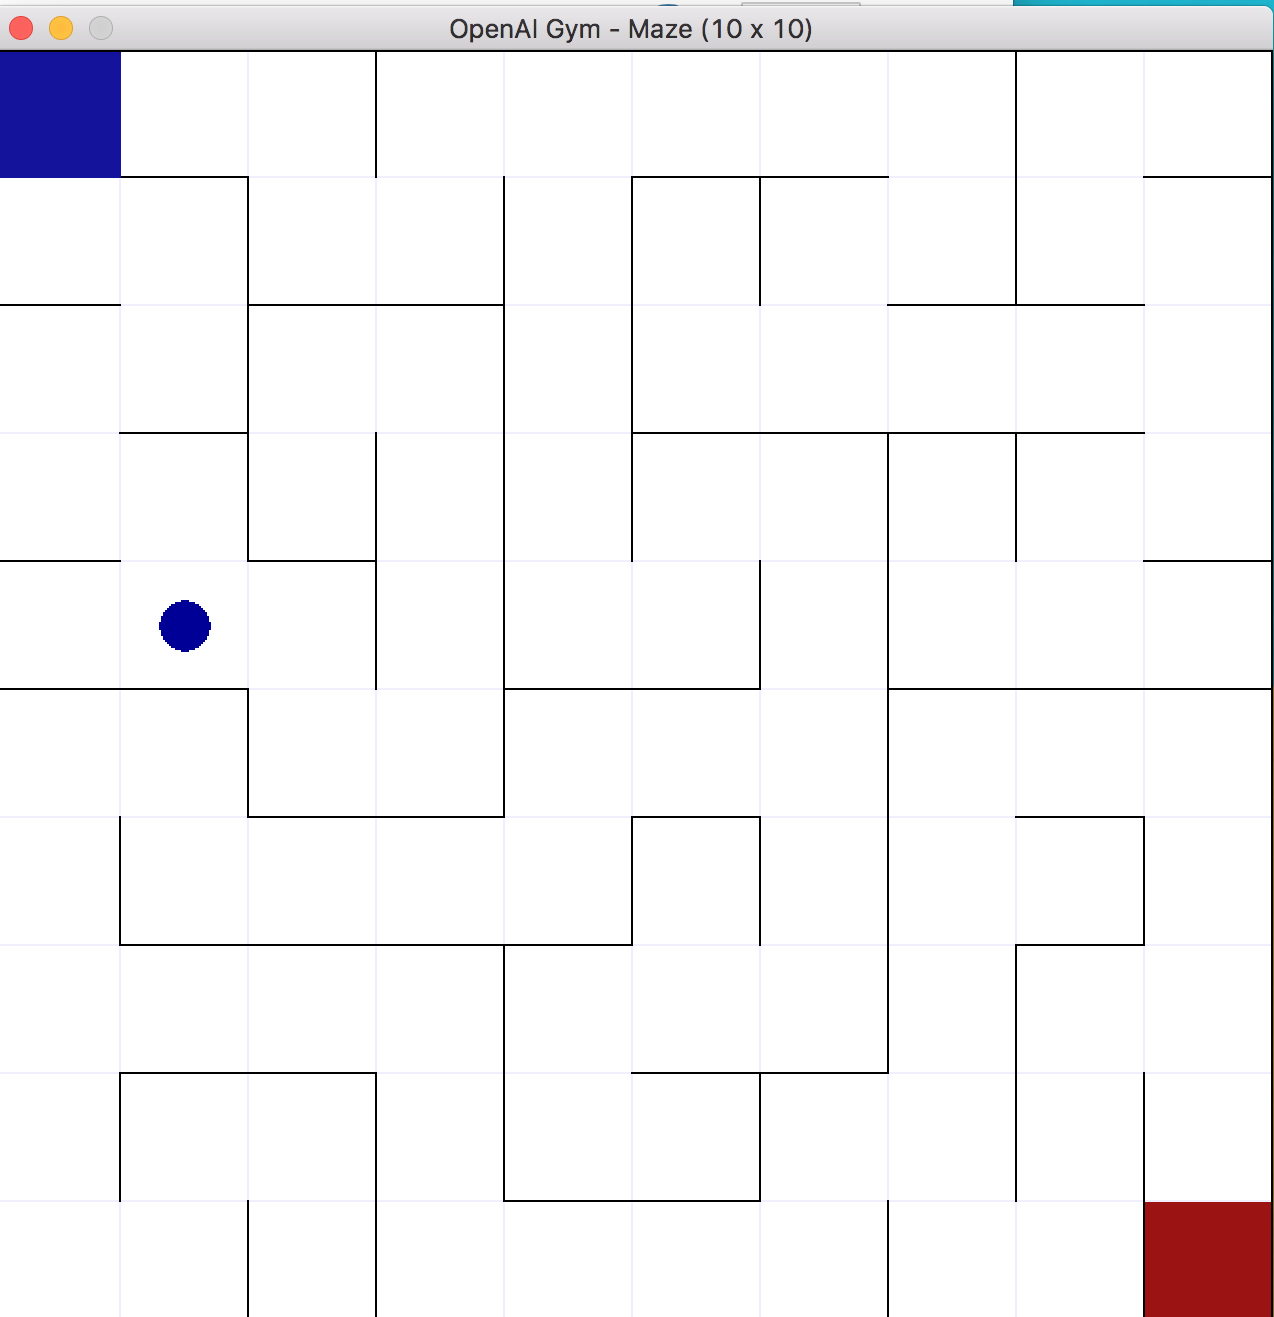

In [22]:
Image(filename='pictures/5.png',width=400, height=400)

In [23]:
env = gym.make(mazes[4])
env_height = env.observation_space.high[0] + 1
env_width = env.observation_space.high[1] + 1
agent = QlearningMouse(env_height, env_width)
find_cheese(env, agent, should_render=False)

Starting episode 0
Episode finished after 3096 timesteps
Starting episode 1
Episode finished after 565 timesteps
Starting episode 2
Episode finished after 2822 timesteps
Starting episode 3
Episode finished after 2039 timesteps
Starting episode 4
Episode finished after 1226 timesteps
Starting episode 5
Episode finished after 123 timesteps
Starting episode 6
Episode finished after 234 timesteps
Starting episode 7
Episode finished after 278 timesteps
Starting episode 8
Episode finished after 112 timesteps
Starting episode 9
Episode finished after 483 timesteps
Starting episode 10
Episode finished after 523 timesteps
Starting episode 11
Episode finished after 284 timesteps
Starting episode 12
Episode finished after 110 timesteps
Starting episode 13
Episode finished after 168 timesteps
Starting episode 14
Episode finished after 63 timesteps
Starting episode 15
Episode finished after 110 timesteps
Starting episode 16
Episode finished after 53 timesteps
Starting episode 17
Episode finished af

### Plotting the Results

In [25]:
def plot_results(maze_episodes, plot_type):
    """
    Given a dictionary that contains data associated with each maze size, 
    returns different plots: number of steps, number of episodes till convergence 
    and execution time.
    """
    optimal_step = {}
    number_of_episodes = {}
    execution_times = {}
    
    for key, value in maze_episodes.items():
        optimal_step[key[0]] = value['steps'][-1]
        number_of_episodes[key[0]] = value['num_episodes']
        execution_times[key[0]] = value['execution_time_ms']

    
    if plot_type == 'optimal_steps':
        x = list(optimal_step.keys())
        y = list(optimal_step.values())
        sns.set()
        fig, ax = plt.subplots(figsize=(12,8))
        sns.lineplot(x, y, markers=True)
        plt.xlabel('Maze Size')
        plt.ylabel('Number of Optimal Steps')
        plt.title("Number of Optimal Steps as a Function of Maze Size",  fontsize='large')
    
    
    if plot_type == 'episodes':
        x = list(number_of_episodes.keys())
        y = list(number_of_episodes.values())
        sns.set()
        fig, ax = plt.subplots(figsize=(12,8))
        sns.lineplot(x, y, markers=True)
        plt.xlabel('Maze Size')
        plt.ylabel('Number of Episodes')
        plt.title("Number of Episodes as a Function of Maze Size",  fontsize='large')
    
    if plot_type == 'exec_time':
        x = list(execution_times.keys())
        y = list(execution_times.values())
        sns.set()
        fig, ax = plt.subplots(figsize=(12,8))
        sns.lineplot(x, y, markers=True)
        plt.xlabel('Maze Size')
        plt.ylabel('Execution Time(ms)')
        plt.title("Execution Time as a Function of Maze Size",  fontsize='large')

As it can be seen below, as the size of the maze increases, it takes a longer time to find the ultimate reward.

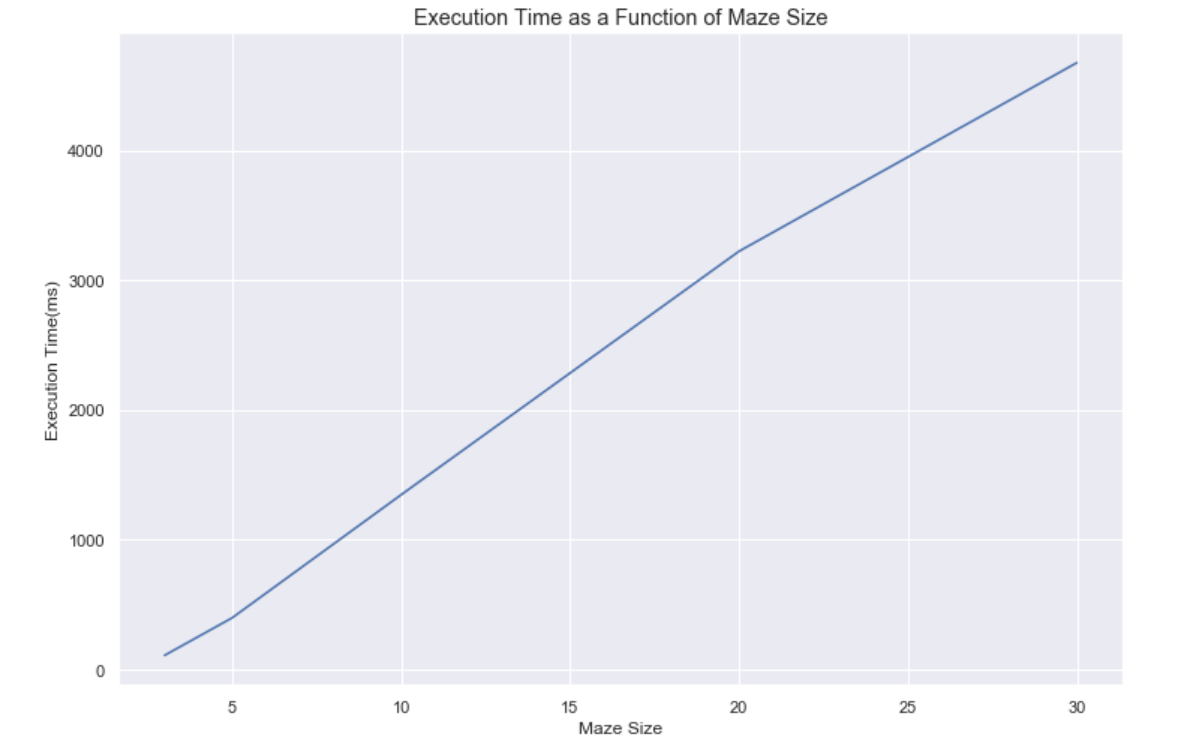

In [27]:
Image(filename='pictures/execution_time.png',width=800, height=800)

As it can be seen below, as the size of the maze increases, the number of optimal steps to find the ultimate reward also increases. The learning will stop if the last 10 number of steps are the same and I've defined that number as the number optimal steps.

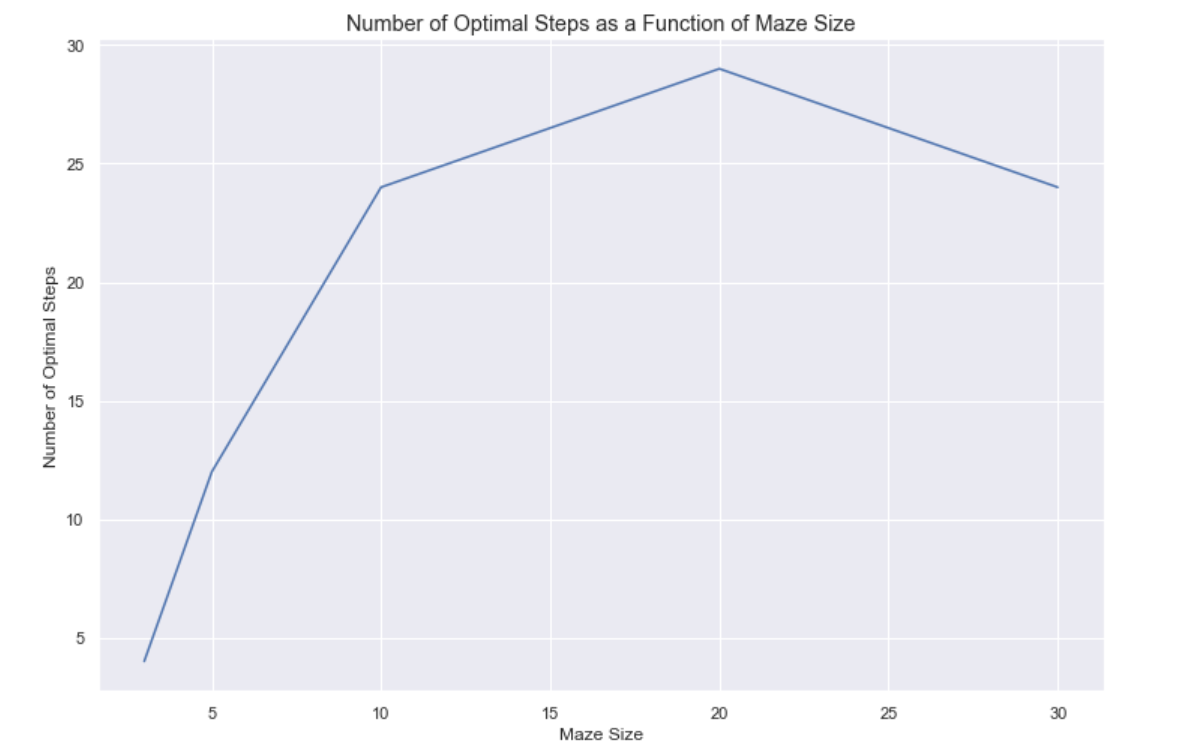

In [28]:
Image(filename='pictures/optimal_steps.png',width=800, height=800)

# Future Directions
I would've used used deep Q-learning and/or double Q-learning if I had more time to work on this project. Tabular Q-learning takes longer and longer as the size of the maze, and hence the Q-table, gets larger. Therefore, training larger mazes (such as the 100x100 maze below) takes over 3 hours with the current Q-learning method I'm using. 

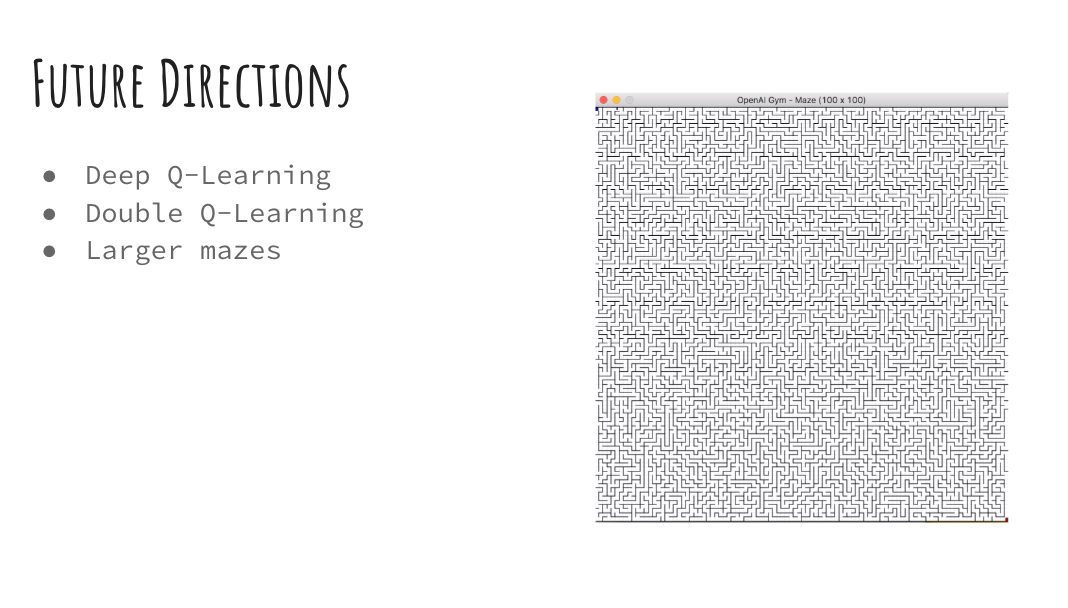

In [29]:
Image(filename='pictures/future_dir.png',width=800, height=800)

# References
* Background information: https://med.stanford.edu/sbfnl/services/bm/lm.html
* Maze environment from: https://github.com/MattChanTK/gym-maze
* Parts of `find_cheese()` function from [OpenAI's](http://gym.openai.com/docs/) documentation